### <font color="Green"> Classificação de Iris <font>

In [2]:
# instalando biblioteca do scikit-learn e o pandas, muito utilizada para IA
# a ! indica um comando que está sendo enviao ao terminal (telinha preta)
! pip install scikit-learn
! pip install pandas

In [3]:
# importando bibliotecas
import pandas as pd
import numpy as np # biblioteca para trabalhar com números
import matplotlib.pyplot as plt # para trabalhar com gráficos
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier #este é o modelo de IA que fará a classificação
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier


In [4]:
# importando os dados, como está na mesma pasta do arquivo csv não há necessidade passar o caminho
# colocar o arquivo na mesma pasta do notebook
df = pd.read_csv('iris.csv', header=None)
df.columns = ["SepalLenght", "SepalWidth", "PetalLenght", "PetalWidth", "Class"]
df.head()

,SepalLenght,SepalWidth,PetalLenght,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# análise estatística dos dados, existe um método já do DataFrame
df.describe()

,SepalLenght,SepalWidth,PetalLenght,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


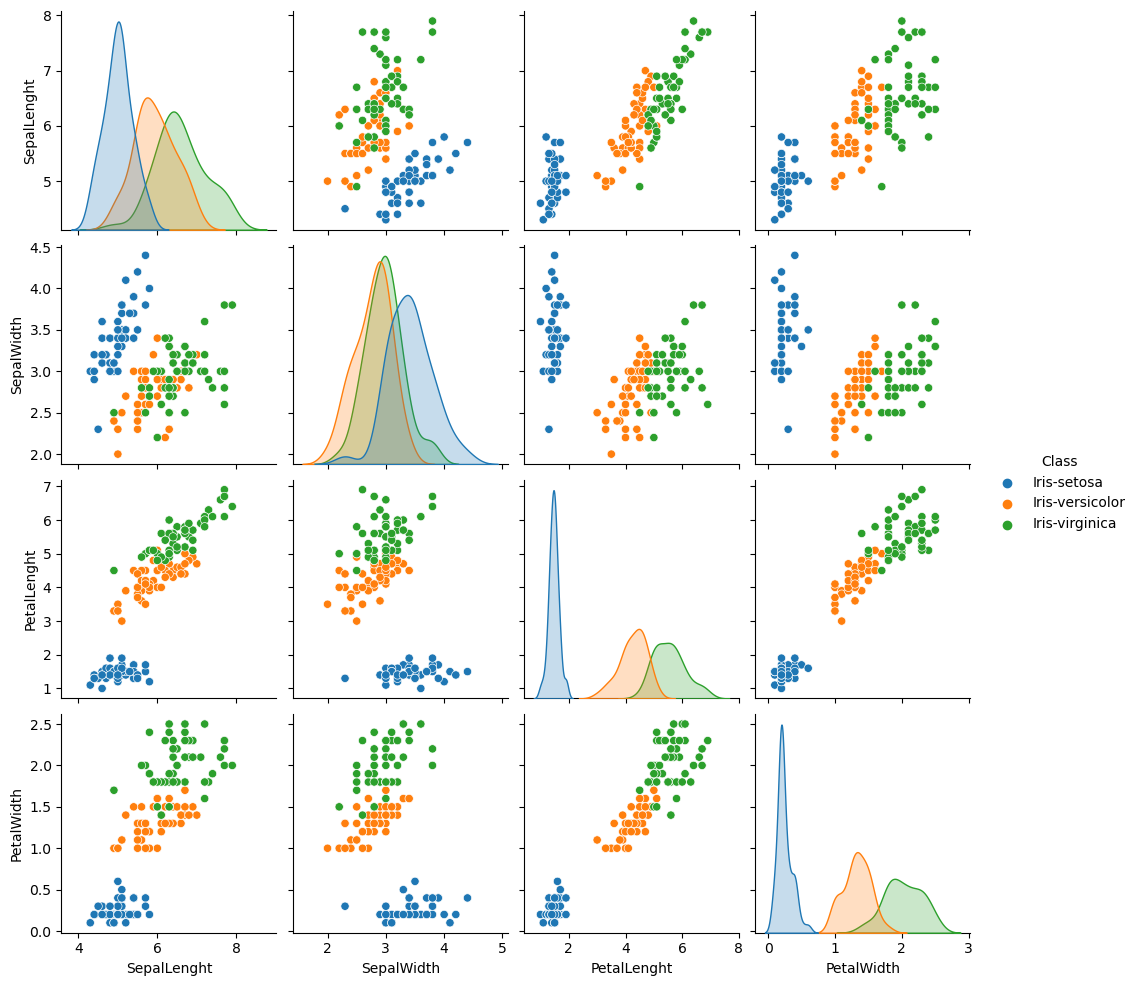

In [6]:
# criando um pair plot para visualizar a correlação entre os fatores considerando os tipos diferentes de iris
sns.pairplot(df, hue= "Class")

In [7]:
# transformando nomes em números (label encoding)
df["Target"]=0
df["Target"] = np.where(df.Class == "Iris-setosa", 0, 
                np.where(df.Class== "Iris-versicolor", 1, 
                np.where(df.Class=="Iris-virginica", 2, "NAN")))
df.head()

,SepalLenght,SepalWidth,PetalLenght,PetalWidth,Class,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
# como foi feita uma nova coluna
df.drop("Class", axis=1, inplace=True)
df.head()

In [11]:
# separar o conjunto para teste e treinamento
x = df.drop(["Target"], axis = 1)
y = df["Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=45)

In [13]:
# aplciar o modelo de IA
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

clf = GridSearchCV(dtree,
                   {'criterion': ["gini" , "entropy"],
                    'max_depth': [4,5,6,7,8,10],
                    'min_samples_split' : [2,3,4],
                    'max_leaf_nodes' : [3,4,5,6,7,8]}
                    )
clf.fit(x_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.9666666666666666
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 3, 'min_samples_split': 2}


In [20]:
# parametrizando o ADA
bdt = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=6,
                                                min_samples_split=2,
                                                max_leaf_nodes=5),
                                                algorithm='SAMME',
                                                n_estimators=100,learning_rate=0.2)

In [22]:
# aplicando o ADA
bdt.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         max_leaf_nodes=5),
                   learning_rate=0.2, n_estimators=100)

In [23]:
y_pred = bdt.predict(x_test)

In [24]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [25]:
print ("Relatório de classificação \n", classification_report(y_pred, y_test))

Relatório de classificação 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      0.89      0.94        19
           2       0.89      1.00      0.94        17

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



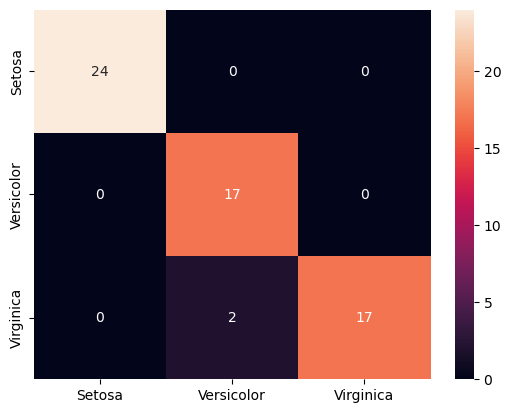

In [27]:
# matriz de confusão
conf = confusion_matrix(y_test, y_pred)
label = ["Setosa", "Versicolor", "Virginica"]
sns.heatmap(conf, annot=True, xticklabels= label, yticklabels=label)
plt.show()